# Etude de la sous-nutrition dans le monde


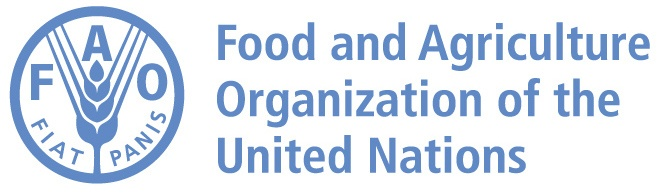


L'étude est un panorama de l’état de la malnutrition dans le monde, à partir des données fournies dans les différents fichiers.

Il y a 4 fichiers CSV à disposition :

- aide_alimentaire.csv : un fichier qui contient le pays bénéficiaire, l'année, le produit, et la quantité qui a été donnée comme aide alimentaire, en tonnes.
- dispo_alimentaire.csv : un fichier contenant pour l'année 2013, le pays, le produit, 4 variables de disponibilité alimentaire, 10 variables qui précisent les utilisations / moyens d'acquisition de la disponibilité alimentaire exprimées en milliers de tonnes et la variable type qui précise si le produit est d'origine animale ou végétale. La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays.
- population.csv : un fichier qui contient le pays, l'année et la population du pays en milliers d'habitants.
- sous_nutrition.csv : un fichier contenant le pays, des intervales d'années et le nombre de personnes en sous-alimentation en millions d'habitants.

In [1]:
import pandas as pd

sousNutrition = pd.read_csv("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 4 Réalisez une étude de santé publique avec R ou Python\DAN-P4-FAO/sous_nutrition.csv")
population = pd.read_csv("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 4 Réalisez une étude de santé publique avec R ou Python\DAN-P4-FAO/population.csv")
dispoAlimentaire = pd.read_csv("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 4 Réalisez une étude de santé publique avec R ou Python\DAN-P4-FAO/dispo_alimentaire.csv")
aideAlimentaire = pd.read_csv("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 4 Réalisez une étude de santé publique avec R ou Python\DAN-P4-FAO/aide_alimentaire.csv")

# Remplacement dans la colonne Valeur des données qui affiche <0.1 par 0.1.
sousNutrition.loc[sousNutrition['Valeur']=="<0.1", 'Valeur'] = 0.01

# Rennome les colonnes Valeur dans les 2 dataframe.
sousNutrition = sousNutrition.rename(columns={'Valeur': 'Sous nutrition'})
population = population.rename(columns={'Valeur': 'Population'})

# Remplacement des valeurs NaN par 0.0.
sousNutrition = sousNutrition.fillna(0.0)
population = population.fillna(0.0)
dispoAlimentaire = dispoAlimentaire.fillna(0.0)

# Mettre les données dans la même valeur numérique car la population est exprimée en millier et la population en sous nutrition est exprimée en million.
sousNutrition['Sous nutrition'] = sousNutrition['Sous nutrition'].astype(float)
sousNutrition['Sous nutrition'] = sousNutrition['Sous nutrition'] * 1000000

population['Population'] = population['Population'] * 1000



# Demande Marc

Les informations des données qui vont être traitées sont pour l’année 2017.

## La proportion de personnes en état de sous-nutrition mondiale

In [2]:
# Selection de l'année 2017 pour la population en sous nutrition.
sousNutrition2017 = sousNutrition.loc[sousNutrition['Année']=='2016-2018', :]

# Ajout de la population au dataframe de la population en sous nutrition pour 2017.
sousNutrition2017 = sousNutrition2017.merge(population.loc[population['Année']==2017, ['Zone', 'Population']],on='Zone')

print("La proportion de personnes en état de sous-nutrition est de", 
      round(sousNutrition2017['Sous nutrition'].sum() / sousNutrition2017['Population'].sum() * 100,1), "%.")

La proportion de personnes en état de sous-nutrition est de 7.1 %.


## Le nombre théorique de personnes qui pourraient être nourries

Pour récolter les données, on va utilisé la colonne de disponibilité alimentaire (Kcal/personne/jour).
On prend comme base la valeur Kcalories par jour pour un humain à 2500.

In [3]:
# Fusion de la population pour 2017 au dataframe dispoAlimentaire.
theoriqueNourri = dispoAlimentaire.merge(population.loc[population['Année']==2017, ['Zone', 'Population']], on='Zone')

# Ajout de la colonne Disponibilité kcal.
theoriqueNourri['Disponibilité kcal'] = theoriqueNourri['Disponibilité alimentaire (Kcal/personne/jour)'] * theoriqueNourri['Population'] * 365

# Calcul du nombre total d'humain pouvant être nourris.
totalHumainNourri = theoriqueNourri['Disponibilité kcal'].sum() / (2500*365)

print("Le nombre théorique d'humain pouvant être nourris est de", round(totalHumainNourri), 
      ", soit", round(totalHumainNourri * 100 / population.loc[population['Année']==2017, 'Population'].sum(),1), "%.")

Le nombre théorique d'humain pouvant être nourris est de 8367593851 , soit 110.9 %.


## Nombre théorique de personnes qui pourraient être nourries concernant les produits végétaux

Même procéder que précédemment mais pour les produits végétaux.

In [4]:
# Sélection des aliments qui ont pour origine les végétaux.
vegetaux = theoriqueNourri.loc[theoriqueNourri['Origine']=="vegetale", :]

# Calcul total d'humain pouvant être nourris par des végétaux.
totalNourriVegetaux = vegetaux['Disponibilité kcal'].sum() / (2500*365)

print("Le nombre de personnes théorique qui pourraient être nourries par des porduits végétaux est de", 
    round(totalNourriVegetaux), ", soit", round(totalNourriVegetaux * 100 / population.loc[population['Année']==2017, 
    'Population'].sum(),1), "%.")

Le nombre de personnes théorique qui pourraient être nourries par des porduits végétaux est de 6904305685 , soit 91.5 %.


## Utilisation de la disponibilité intérieure

Recueillir la part qui est attribuée à l'alimentation animale, celle qui est perdue et celle qui est utilisée pour l'alimentation humaine. 

La disponibilité intérieure peut être obtenue de 2 manières différentes :
- Première méthode : Importations + Production + Variation de stock - Exportations
- Deuxième méthode : Nourriture + Pertes + Semences + Traitement + Aliments pour animaux + Autres utilisations

In [5]:
# Somme total de la disponibilité intérieure.
totalDispoInterieure = dispoAlimentaire['Disponibilité intérieure'].sum()

# Somme total des aliments destinés aux animaux.
totalAlimentAnimaux = dispoAlimentaire['Aliments pour animaux'].sum()

# Somme total des pertes.
totalPerte = dispoAlimentaire['Pertes'].sum()

# Somme total des alimments destinés aux humains
totalAlimentHumain = dispoAlimentaire['Nourriture'].sum()

print("La répartition de l'utilisation de la disponibilité totale des aliments est de : \n-", 
      round(totalAlimentAnimaux / totalDispoInterieure * 100,1), "% pour la part attribuée à l'alimentation amimale. \n-", 
      round(totalAlimentHumain / totalDispoInterieure * 100,1), "% pour la part attribuée à l'alimentation humaine. \nLa perte alimentaire représente", 
      round(totalPerte / totalDispoInterieure * 100,1), "% de la disponibilité totale alimentaire.")

La répartition de l'utilisation de la disponibilité totale des aliments est de : 
- 13.2 % pour la part attribuée à l'alimentation amimale. 
- 49.5 % pour la part attribuée à l'alimentation humaine. 
La perte alimentaire représente 4.6 % de la disponibilité totale alimentaire.


# Demande de Julien

## Répartition des céréales entre humains et animaux

On va récupérer les différentes céréales pour nous permettre de faire la répartition entre humains et animaux.
Pour cela, on va consulter l'onglet Bilans alimentaires dans le lien suivant : https://www.fao.org/faostat/fr/#data.
Voici la liste des céréales qu'on peut trouver :
- Blé
- Riz
- Orge
- Maïs
- Seigle
- Avoine
- Millet
- Sorgho
- Céréales, Autres

La colonne Nourriture est utilisée ici pour l'alimentation humaine.

In [6]:
# Liste de toutes les céréales
listeCereales=["Céréales, Autres","Avoine", "Blé", "Riz (Eq Blanchi)", "Orge", "Maïs","Seigle", "Millet", "Sorgho"]

# Filtre les produits pour le nouveau dataframe pour qu'il contient que des céréales.
dataframeCereales = dispoAlimentaire[dispoAlimentaire['Produit'].isin(listeCereales)]

# Somme totale de céréales pour les animaux.
totalCerealeAnimaux = dataframeCereales['Aliments pour animaux'].sum()

# Somme totale de céréales à destination des humains.
totalCerealeHumain = dataframeCereales['Nourriture'].sum()

# Somme totale de la disponibilité intérieur.
totalDispo = dataframeCereales['Disponibilité intérieure'].sum()

print("La répartition des céréales est de", round(totalCerealeHumain / totalDispo * 100,1), "% pour les humains et de", 
      round(totalCerealeAnimaux / totalDispo * 100,1), "% pour les animaux.")

La répartition des céréales est de 42.8 % pour les humains et de 36.3 % pour les animaux.


## Thaïlande

La Thaïlande a une utilisation du Manioc particulière à l'égards de la proportion de personnes en sous-nutritions, concernant l'exportation par rapport à la production, c'est pour cela une étude est mené.

In [7]:
# Population pour l'année 2017.
popuThailande =  float(population.loc[(population['Zone'] == "Thaïlande") & (population['Année'] == 2017), 'Population'])

# Poupulation en sous nutrition pour l'année 2017.
sousNutritionThailande = float(sousNutrition.loc[(sousNutrition['Année']=='2016-2018') & (sousNutrition['Zone'] == "Thaïlande"), 'Sous nutrition'])

# Récupération de l'exportation du Manioc
exportationManioc = dispoAlimentaire.loc[(dispoAlimentaire['Zone']=="Thaïlande") & (dispoAlimentaire['Produit']=="Manioc"),'Exportations - Quantité']

# Ratio du Maniac par rapport à la production
ratioManiocProduction = float (exportationManioc / dispoAlimentaire.loc[(dispoAlimentaire['Zone']=="Thaïlande") & (dispoAlimentaire['Produit']=="Manioc"), 'Production'] * 100 )


print("Le manioc représente", round(ratioManiocProduction,1), "% de l'exportation par rapport à la production. \nLes personnes en sous nutrition est de", 
      round(sousNutritionThailande / popuThailande * 100,1) , "%.")

Le manioc représente 83.4 % de l'exportation par rapport à la production. 
Les personnes en sous nutrition est de 9.0 %.


# Demande de Mélanie

## Les pays où la proportion de personnes sous-alimentées est la plus forte en 2017

In [8]:
# Selection de l'année 2017
population2017 = population.loc[population['Année']==2017, :]

# Fusion des dataframe sousNutrition2017 et population2017
population2017 = population2017.merge(sousNutrition.loc[sousNutrition['Année'] == "2016-2018", ['Zone', 'Sous nutrition']], on='Zone')

# Ajout de la colonne Pourcentage sous nutrition
population2017['Pourcentage sous nutrition'] = round(population2017['Sous nutrition'] / population2017['Population'] * 100,1)

#trier selon l’identifiant par ordre décroissant :
population2017.sort_values('Pourcentage sous nutrition', ascending = False)[:10]

,Zone,Année,Population,Sous nutrition,Pourcentage sous nutrition
78,Haïti,2017,10982366.0,5300000.0,48.3
157,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.2
108,Madagascar,2017,25570512.0,10500000.0,41.1
103,Libéria,2017,4702226.0,1800000.0,38.3
100,Lesotho,2017,2091534.0,800000.0,38.2
183,Tchad,2017,15016753.0,5700000.0,38.0
161,Rwanda,2017,11980961.0,4200000.0,35.1
121,Mozambique,2017,28649018.0,9400000.0,32.8
186,Timor-Leste,2017,1243258.0,400000.0,32.2
0,Afghanistan,2017,36296113.0,10500000.0,28.9


## Pays qui ont bénéficiés le plus d’aide depuis 2013

In [13]:
# Renomme la colonne Valeur en Aide
aideAlimentaire = aideAlimentaire.rename(columns={'Valeur': 'Quantité (en tonne)'})

# Somme des aides reçus par pays.
aideParZone= aideAlimentaire.groupby('Pays bénéficiaire')['Quantité (en tonne)'].sum()

# Réinitialisation de l'index pour replacer les données en colonne due au groupby.
aideParZone = aideParZone.reset_index()

# Affiche les pays qui ont bénéficiés le plus d'aide.
aideParZone.sort_values('Quantité (en tonne)', ascending = False)[:10]

,Pays bénéficiaire,Quantité (en tonne)
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666
5,Bolivie (État plurinational de),6
6,Burkina Faso,64812
7,Burundi,77318
8,Bénin,22224
9,Cambodge,25780


## Pays ayant le plus de disponibilité alimentaire par habitant

In [10]:
# Somme des disponibilités alimentaire par pays.
dispoParZone = dispoAlimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

# Réinitialisation de l'index pour replacer les données en colonne due au groupby.
dispoParZone = dispoParZone.reset_index()

# Affiche les pays avec le plus de disponibilité par habitant.
dispoParZone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)[:10]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


## Pays ayant le moins de disponibilité alimentaire par habitant

In [11]:
# Affiche les pays avec le moins de disponibilité par habitant.
dispoParZone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')[:10]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0
